### 功能

* 利用OpenCV寫出兩個簡單的影像處理功能：
* 縮放圖片：指定輸出圖片大小(可能比原圖大或比原圖小)並可指定放大縮小的內插方式(最近鄰/線性)
* 模糊圖片：可指定模糊圖片的模糊方式(Average Blur/Medium Blur/Gaussian Blur)並可以改變Filter的大小(整數奇數即可)
* 在輸出的圖片右下角加上屬於自己的簽名(利用圖檔)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 讀取圖片設定

In [2]:
def img_show(img):
    '''
    Show BGR image
    '''
    plt.figure(figsize=(15, 12))
    plt.title(f"Shape: {img.shape}")
    plt.imshow(img)
    plt.show()

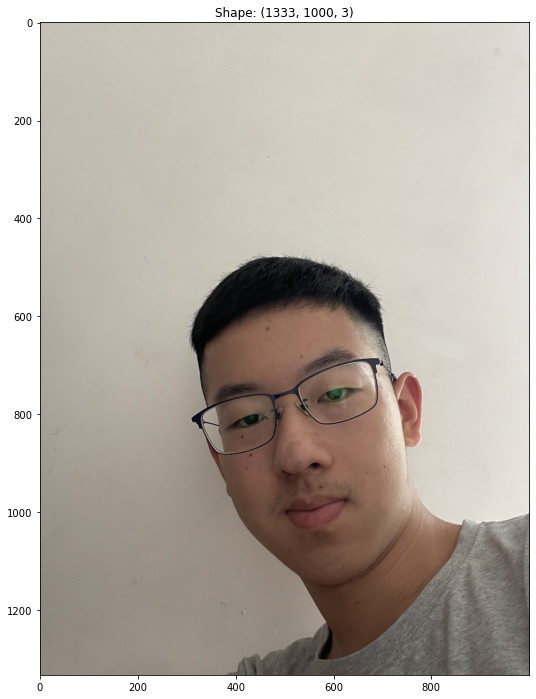

In [114]:
ori_img = cv2.imread("pic_selfie.jpeg")
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)

img_show(ori_img)

### 新增簽名設定
* 讀取簽名
* 呼叫函數`add_signature()`建立

In [4]:
ori_sig = cv2.imread("signature.png")
ori_sig = cv2.cvtColor(ori_sig, cv2.COLOR_BGR2RGB)

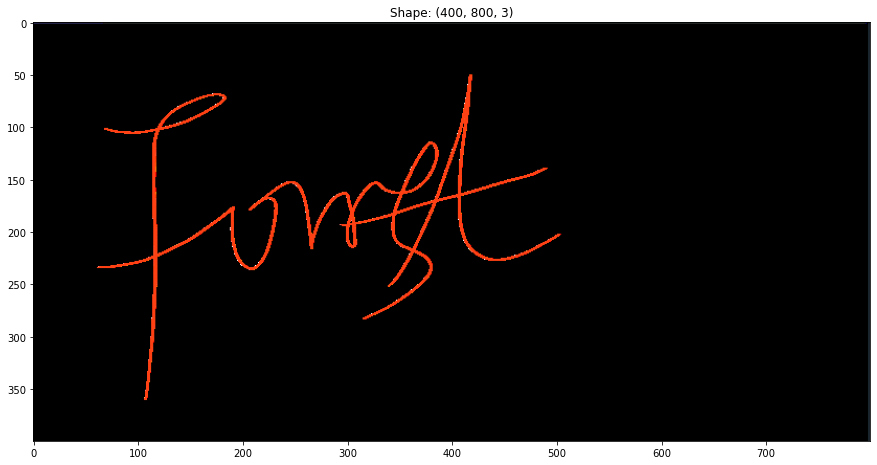

In [5]:
img_show(ori_sig)

In [6]:
def add_signature(sig, img):
    '''
    Add `sig` image over `img` image
    '''
    sig_height = sig.shape[0]
    sig_width = sig.shape[1]
    img_height = img.shape[0]
    img_width = img.shape[1]
    
    for sig_row_id, img_row_id in enumerate(range(img_height - sig_height, img_height)):
        for sig_col_id, img_col_id in enumerate(range(img_width - sig_width, img_width)):
            sig_val = sig[sig_row_id, sig_col_id]
            
            if (sig_val == 0).all() == False: # signature ink exists
                img[img_row_id, img_col_id] = sig_val

    return img

In [7]:
# test `add_signature`
#ret_img = add_signature(ori_sig, ori_img)
#img_show(ret_img)

In [8]:
#ret_img = cv2.cvtColor(ret_img, cv2.COLOR_RGB2BGR)
#cv2.imwrite("sig_img.jpg", ret_img)

### Section 1: 縮放圖片

#### *程式碼區塊*

In [102]:
def resize_linear(img, ratio, axis):
    '''
    Resizing function: Utilizing Linear Interpolation
    * used for up scaling only
    * resize on 1 axis
    '''
    if ratio < 1:
        exit(0)
    elif ratio == 1:
        return img
    
    ori_shape = img.shape[axis]
    tar_shape = round(ori_shape * ratio)
    
    step = tar_shape / ori_shape # float type
    
    if axis == 0: # resize on height (axis 0)
        img_new = np.zeros([tar_shape, img.shape[1], 3], dtype=np.int)
        
        # iterate on axis 1, then on axis 0
        for out_id in range(img.shape[1]):
            for on_id in range(tar_shape):
                # fill empty pixel with linear calculated value
                traced = on_id / step
                
                if traced < (ori_shape-1): # prevent index from `index out of range` error
                    left_id = int(traced)
                    right_id = left_id + 1
                    dist_to_left = traced - int(traced)
                    dist_to_right = 1 - dist_to_left

                    # Equation: Y=A+l*(B-A)/L
                    val = (1 - dist_to_left) * img[left_id, out_id] + dist_to_left * img[right_id, out_id]
                    val = val.round().astype(int)
                else:
                    val = img[ori_shape-1, out_id]
                                
                img_new[on_id, out_id] = val
                    
    else: # resize on width (axis 1)
        img_new = np.zeros([img.shape[0], tar_shape, 3], dtype=np.int)
        
        # iterate on axis 0, then on axis 1
        for out_id in range(img.shape[0]):
            for on_id in range(tar_shape):
                # fill empty pixel with linear calculated value
                traced = on_id / step
                
                if traced < (ori_shape-1): # prevent index from `index out of range` error
                    left_id = int(traced)
                    right_id = left_id + 1
                    dist_to_left = traced - int(traced)
                    dist_to_right = 1 - dist_to_left

                    # Equation: Y=A+l*(B-A)/L
                    val = (1 - dist_to_left) * img[out_id, left_id] + dist_to_left * img[out_id, right_id]
                    val = val.round().astype(np.int)
                else:
                    val = img[out_id, ori_shape-1]
                                
                img_new[out_id, on_id] = val
                
    return img_new

In [113]:
# test `resize_linear`
#img_new = resize_linear(ori_img, 2, 1)
#img_show(img_new)

In [11]:
def resize_nn(img, ratio: float, axis: int):
    '''
    Resizing function: Utilizing Nearest Neighbor
    * used for up scaling only
    * resize on 1 axis
    '''
    if ratio < 1:
        exit(0)
    elif ratio == 1:
        return img
    
    ori_shape = img.shape[axis]
    tar_shape = round(ori_shape * ratio)
    
    step = tar_shape / ori_shape # float type
    
    if axis == 0: # resize on height (axis 0)
        img_new = np.zeros([tar_shape, img.shape[1], 3], dtype=np.int)
        
        # iterate on axis 1, then on axis 0
        for out_id in range(img.shape[1]):
            for on_id in range(tar_shape):
                # fill empty pixel with nearest neighbor
                traced_id = round(on_id / step)
                traced_id = min(traced_id, ori_shape-1) # prevent index overflow
                img_new[on_id, out_id] = img[traced_id, out_id]
                    
    else: # resize on width (axis 1)
        img_new = np.zeros([img.shape[0], tar_shape, 3], dtype=np.int)
        
        # iterate on axis 0, then on axis 1
        for out_id in range(img.shape[0]):
            for on_id in range(tar_shape):
                # fill empty pixel with nearest neighbor
                traced_id = round(on_id / step)
                traced_id = min(traced_id, ori_shape-1) # prevent index overflow
                img_new[out_id, on_id] = img[out_id, traced_id]
                
    return img_new

In [12]:
# test `resize_nn`
#img_new = resize_nn(img, 2, 0)
#img_show(img_new)

In [13]:
def resize_downscale(img, ratio: float, axis: int):
    '''
    Resizing function: Utilizing Nearest Neighbor
    * used for down scaling only
    * resize on 1 axis
    * Average Sampling downscaling method(slower) available in comment
    '''
    if ratio > 1:
        exit(0)
    elif ratio == 1:
        return img
    
    ori_shape = img.shape[axis]
    tar_shape = round(ori_shape * ratio)
    
    step = ori_shape / tar_shape # float type
    
    if axis == 0: # resize on height (axis 0)
        img_new = np.zeros([tar_shape, img.shape[1], 3], dtype=np.int)
        
        # iterate on axis 1, then on axis 0
        for out_id in range(img.shape[1]):
            for on_id in range(tar_shape):
                # shrink of dimension
                img_new[on_id, out_id] = img[round(step * on_id), out_id] # nn
                #img_new[on_id, out_id] = round(np.average(img[round(step*on_id):round(step*on_id+step-1), out_id])) # average sampling
                    
    else: # resize on width (axis 1)
        img_new = np.zeros([img.shape[0], tar_shape, 3], dtype=np.int)
        
        # iterate on color axis 0, then on axis 1
        for out_id in range(img.shape[0]):
            for on_id in range(tar_shape):
                # shrink of dimension
                img_new[out_id, on_id] = img[out_id, round(step * on_id)] # nn
                #img_new[out_id, on_id] = round(np.average(img[out_id, round(step*on_id):round(step*on_id+step-1)])) # average sampling
                
    return img_new

In [14]:
# test `resize_downscale`
#img_new = resize_downscale(img, 0.6, 1)
#img_show(img_new)

In [15]:
def resize(img, ratio: tuple, mode="linear"):
    '''
    Main control of resizing actions
    '''
    rat_0, rat_1 = ratio
    
    print("Start processing...")
    
    if mode == "linear":
        # resize on axis 0
        if rat_0 <= 1:
            img = resize_downscale(img, rat_0, 0)
        else:
            img = resize_linear(img, rat_0, 0)
        
        print("Half way till finished...")
        
        # resize on axis 1
        if rat_1 <= 1:
            img = resize_downscale(img, rat_1, 1)
        else:
            img = resize_linear(img, rat_1, 1)
        
    elif mode in {"nn", "nearest_neighbor", "nearest_neighbour"}:
        # resize on axis 0
        if rat_0 <= 1:
            img = resize_downscale(img, rat_0, 0)
        else:
            img = resize_nn(img, rat_0, 0)
            
        print("Half way till finished...")
        
        # resize on axis 1
        if rat_1 <= 1:
            img = resize_downscale(img, rat_1, 1)
        else:
            img = resize_nn(img, rat_1, 1)
    else:
        print("Wrong mode chosen")
        exit(1)
        
    print("Finished")
        
    return img

#### 縮放圖片
1. 高、寬度設定為原來的 0.11, 0.13 倍
2. 高、寬度設定為原來的 0.5, 5 倍
3. 高、寬度設定為原來的 3.3, 3.3 倍，使用 linear interpolation
4. 高、寬度設定為原來的 3.3, 3.3 倍，使用 nearest neighbor
5. 比較線性內插時從不同方向進行內插的結果
* 高、寬度設定為原來的 1.5, 1.5 倍,加去背簽名

Resize ratio (height,width): 
Example: 0.3,1.5
> 3.3,3.3
Start processing...
Half way till finished...
Finished


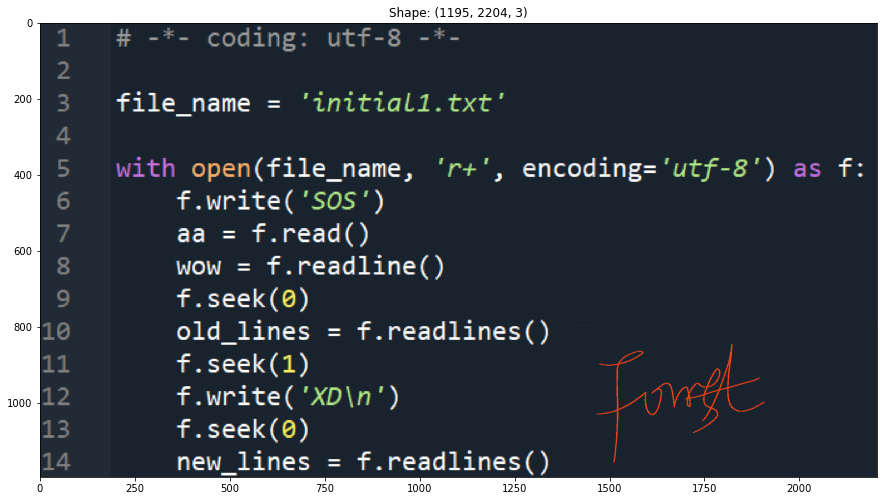

In [67]:
def resize_main():
    '''
    Q1: Resizing section
    '''
    ratio = input("Resize ratio (height,width): \nExample: 0.3,1.5\n> ")
    rat_0, rat_1 = ratio.split(",")
    rat_0 = float(rat_0)
    rat_1 = float(rat_1)

    img_new = resize(ori_img, (rat_0, rat_1), mode="nn")
    img_new = add_signature(ori_sig, img_new) # add signature
    img_show(img_new)
    
resize_main()

In [16]:
#img_new = cv2.cvtColor(img_new, cv2.COLOR_RGB2BGR)
#cv2.imwrite("img_linear.jpg", img_new)

### Section 2: 模糊圖片

#### *程式碼區塊*

In [72]:
def blur_average(img, kernel: tuple):
    '''
    Blurring function: Utilizing averaging method
    * iterate through empty new image pixels
    * new image pixels determined by average of values in sliding squares
    '''
    img_h = img.shape[0]
    img_w = img.shape[1]
    kernel_h = kernel[0]
    kernel_w = kernel[1]
    new_h = img_h - kernel_h + 1
    new_w = img_w - kernel_w + 1
    
    new_img = np.zeros([new_h, new_w, 3], dtype=np.int)
    
    for h_id in range(new_h):
        if h_id % 200 == 0:
            print(f"Current Progress: {h_id/new_h*100}%")
            
        for w_id in range(new_w):
            new_img[h_id, w_id] = np.average(img[h_id:(h_id+kernel_h), w_id:(w_id+kernel_w)], axis=(0, 1))
            
    return new_img

In [73]:
# test `blur_average`
#img_new = blur_average(ori_img, (5, 5))
#img_show(img_new)

In [74]:
def blur_median(img, kernel: tuple):
    '''
    Blurring function: Utilizing median method
    * iterate through empty new image pixels
    * new image pixels determined by median of values in sliding squares
    '''
    img_h = img.shape[0]
    img_w = img.shape[1]
    kernel_h = kernel[0]
    kernel_w = kernel[1]
    new_h = img_h - kernel_h + 1
    new_w = img_w - kernel_w + 1
    
    new_img = np.zeros([new_h, new_w, 3], dtype=np.int)
    
    for h_id in range(new_h):
        if h_id % 200 == 0:
            print(f"Current Progress: {h_id/new_h*100}%")
            
        for w_id in range(new_w):
            new_img[h_id, w_id] = np.median(img[h_id:(h_id+kernel_h), w_id:(w_id+kernel_w)], axis=(0, 1))
            
    return new_img

In [75]:
# test `blur_median`
#img_new = blur_median(ori_img, (5, 5))
#img_show(img_new)

In [76]:
def blur_gaussian(img, kernel: tuple):
    '''
    Blurring function: Utilizing cv2 built-in `GaussianBlur` function
    '''
    return cv2.GaussianBlur(img, kernel, 0)

In [77]:
# test `blur_gaussian`
#img_new = blur_gaussian(ori_img, (5, 5))
#img_show(img_new)

In [86]:
def blur(img, mode="average", filter_size=3):
    '''
    Main control of blurring actions
    '''
    kernel = (filter_size, filter_size)

    if mode == "average":
        img = blur_average(img, kernel)
    elif mode == "median":
        img = blur_median(img, kernel)
    elif mode == "gaussian":
        img = blur_gaussian(img, kernel)
    else:
        print("Wrong mode chosen")
        exit(1)
        
    return img

#### 模糊圖片
1. 使用 Averaging Blur 方法
2. 使用 Median Blur 方法
3. 使用 Gaussian Blur 方法
4. 比較分析三種模糊方法在人臉照片下的差別
* 加去背簽名

average
Current Progress: 0.0%
Current Progress: 15.16300227445034%
Current Progress: 30.32600454890068%
Current Progress: 45.489006823351026%
Current Progress: 60.65200909780136%
Current Progress: 75.8150113722517%
Current Progress: 90.97801364670205%


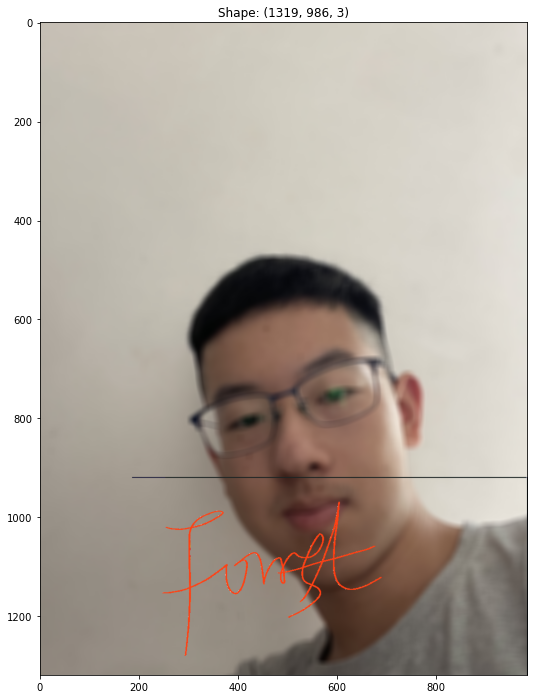

median
Current Progress: 0.0%
Current Progress: 15.16300227445034%
Current Progress: 30.32600454890068%
Current Progress: 45.489006823351026%
Current Progress: 60.65200909780136%
Current Progress: 75.8150113722517%
Current Progress: 90.97801364670205%


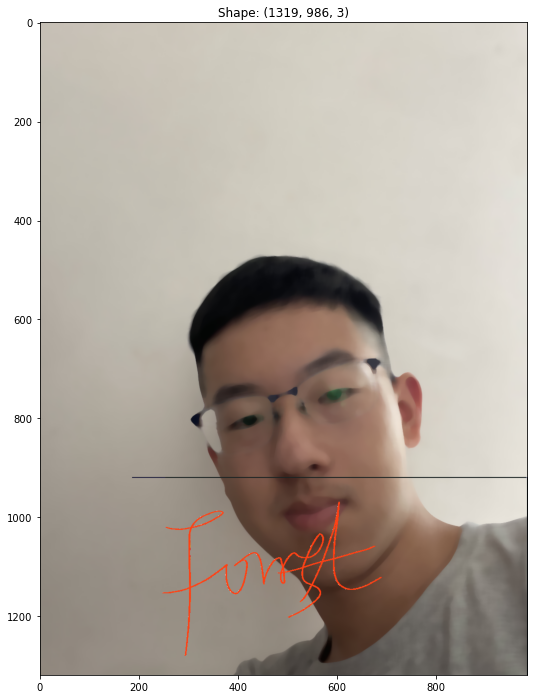

gaussian


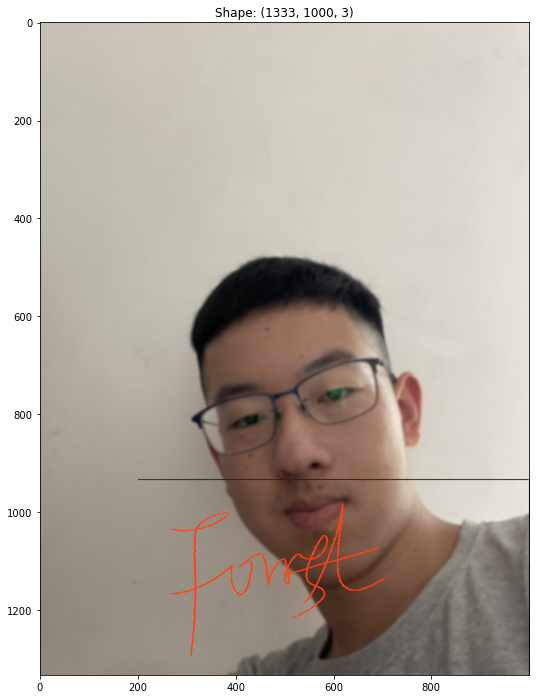

In [101]:
def blur_main():
    '''
    Q2: Blurring section
    '''
    
    print("average")
    new_img = blur(ori_img, mode="average", filter_size=15)
    new_img = add_signature(ori_sig, new_img)
    
    img_show(new_img)
    
    print("median")
    new_img = blur(ori_img, mode="median", filter_size=15)
    new_img = add_signature(ori_sig, new_img)
    
    img_show(new_img)
    
    print("gaussian")
    new_img = blur(ori_img, mode="gaussian", filter_size=15)
    new_img = add_signature(ori_sig, new_img)
    
    img_show(new_img)
    
blur_main()